# Stochastic Simulation - Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import secrets
import math

## Lecture 1 Exercise 1 - The Monty Hall Problem

In [2]:
def monty_hall(switch_door, n_simulations):
    
    wins = 0

    for n in range(n_simulations):
        first_trial = np.random.randint(0, 3)
        doors_left = np.delete(doors, first_trial)
        if switch_door:
            second_trial = np.random.randint(0, 2)
            door_final = doors_left[second_trial]
        else:
            second_trial = first_trial
            door_final = doors[second_trial]
        if door_final == 'car':
            wins += 1
    
    return wins

doors = np.random.permutation(np.array(['goat', 'goat', 'car']))

n_sims = 100000

wins_switch_door = monty_hall(True, n_sims) / n_sims
wins_keep_door = monty_hall(False, n_sims) / n_sims

print(f"Average wins when switching door: {wins_switch_door}")
print(f"Average wins when keeping door: {wins_keep_door}")



Average wins when switching door: 0.33353
Average wins when keeping door: 0.33317


## Lecture 1 Exercise 2 - Galton Table

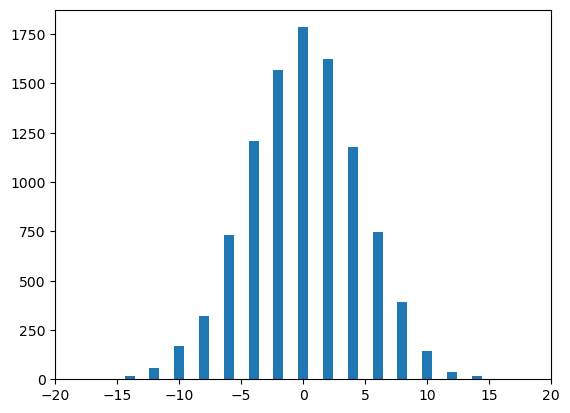

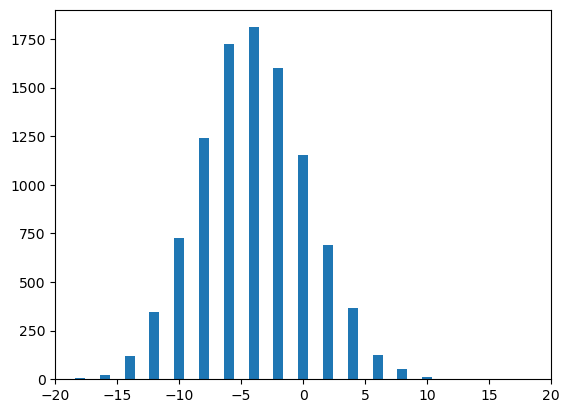

In [3]:
def galton_table(n_layers, n_trials, p=0.5):

    k_slots = dict()
    for i in range(n_trials):
        k = 0
        for n in range(n_layers):
            if np.random.uniform(0, 1) < p:
                k += 1
            else:
                k -= 1
        if k in k_slots.keys():
            k_slots[k] += 1
        else:
            k_slots[k] = 1
    
    return k_slots


n_trials = 10000
n_layers = 20

k_slots = galton_table(n_layers, n_trials)
plt.bar(k_slots.keys(), k_slots.values())
plt.xlim((-n_layers, n_layers))
plt.show()

k_slots_biased = galton_table(n_layers, n_trials, p=0.4)
plt.bar(k_slots_biased.keys(), k_slots_biased.values())
plt.xlim((-n_layers, n_layers))
plt.show()

## Lecture 1 Exercise 3 - Central Limit Theorem

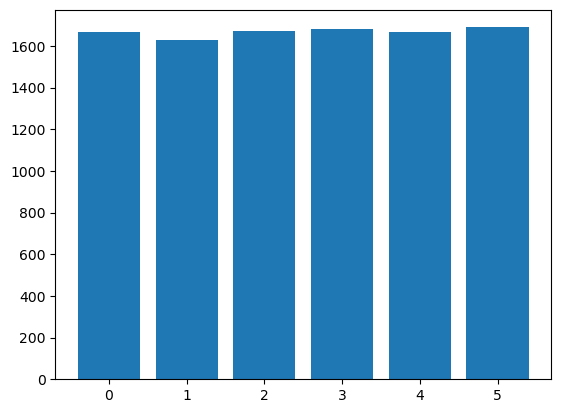

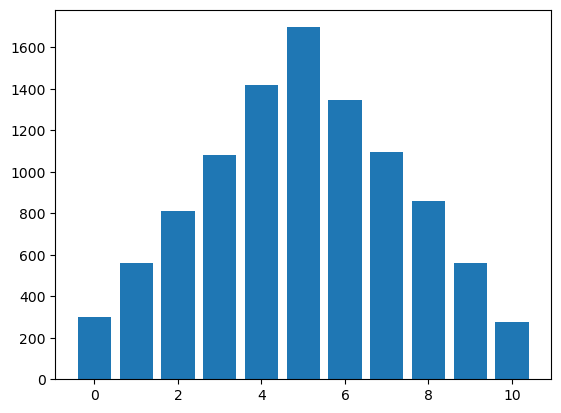

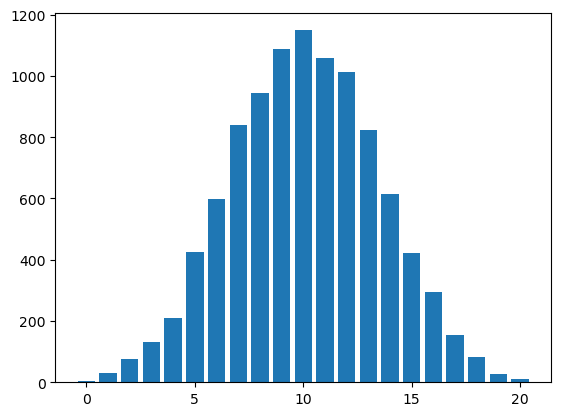

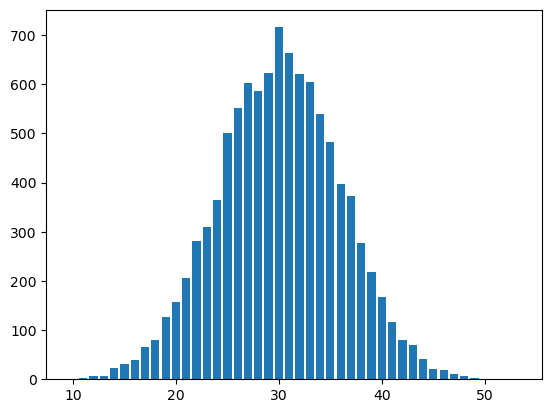

In [4]:
def dice_rolls(n_dice, n_rolls):

    dice_sums = dict()
    for n in range(n_rolls):
        dice_result = np.sum(np.random.randint(0, 6, n_dice))
        if dice_result in dice_sums.keys():
            dice_sums[dice_result] += 1
        else:
            dice_sums[dice_result] = 1

    return dice_sums

n_rolls = 10000
n_dice = 1
dice_sums = dice_rolls(n_dice, n_rolls)
plt.bar(dice_sums.keys(), dice_sums.values())
plt.show()

n_dice = 2
dice_sums = dice_rolls(n_dice, n_rolls)
plt.bar(dice_sums.keys(), dice_sums.values())
plt.show()

n_dice = 4
dice_sums = dice_rolls(n_dice, n_rolls)
plt.bar(dice_sums.keys(), dice_sums.values())
plt.show()

n_dice = 12
dice_sums = dice_rolls(n_dice, n_rolls)
plt.bar(dice_sums.keys(), dice_sums.values())
plt.show()

## Lecture 2 Exercise 1 - PRNG

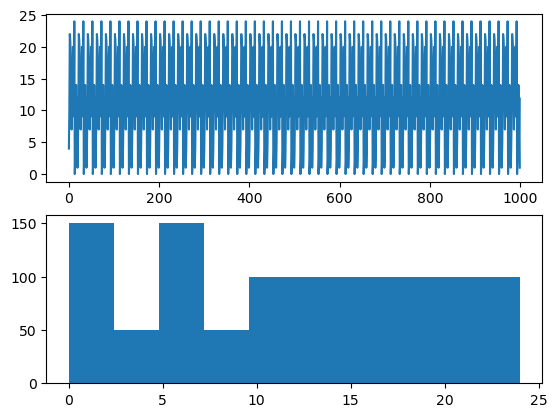

C:\Users\mihbo\AppData\Local\Temp\ipykernel_21764\1706282959.py:13: RuntimeWarning: overflow encountered in exp
  y_seq = np.mod((np.exp(a*x_seq+b)-c)/a, m)
C:\Users\mihbo\AppData\Local\Temp\ipykernel_21764\1706282959.py:13: RuntimeWarning: invalid value encountered in remainder
  y_seq = np.mod((np.exp(a*x_seq+b)-c)/a, m)


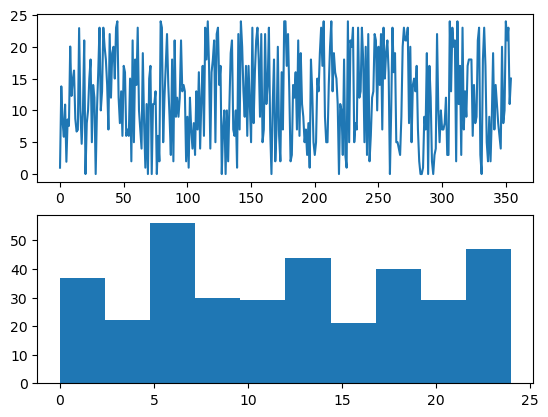

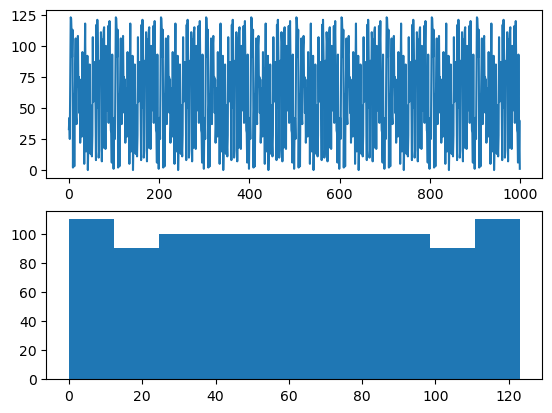

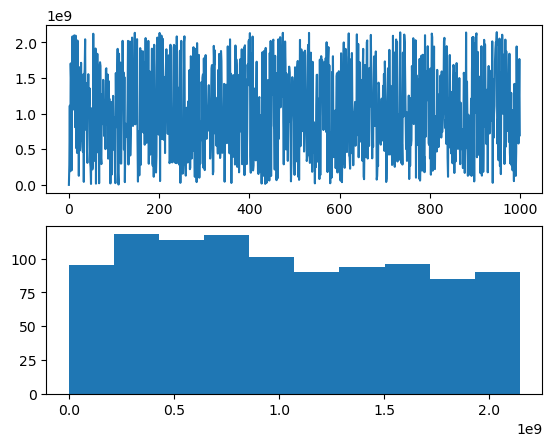

In [5]:
def prng(n, a, m, c, x0=1):
    x = x0
    x_seq = np.empty(n)
    x_seq[0] = x0
    for i in range(n):
        x = (a*x+c)%m
        x_seq[i] = x
    return x_seq

def prng_non_rec(n, a, m, c, x0=1):
    x_seq = np.arange(0, n+1, 1)
    b = np.log(a*x0+c)
    y_seq = np.mod((np.exp(a*x_seq+b)-c)/a, m)
    return y_seq

fig, axs = plt.subplots(2, 1)
seq = prng(1000, 2, 25, 2)
axs[0].plot(seq)
axs[1].hist(seq)
plt.show()

fig, axs = plt.subplots(2, 1)
seq = prng_non_rec(1000, 2, 25, 2)
axs[0].plot(seq)
axs[1].hist(seq)
plt.show()

fig, axs = plt.subplots(2, 1)
seq = prng(1000, 12, 125, 21)
axs[0].plot(seq)
axs[1].hist(seq)
plt.show()

fig, axs = plt.subplots(2, 1)
seq = prng(1000, 7**5, 2**31-1, 21)
axs[0].plot(seq)
axs[1].hist(seq)
plt.show()

## Lecture 2 Exercise 2 - CSPRNG

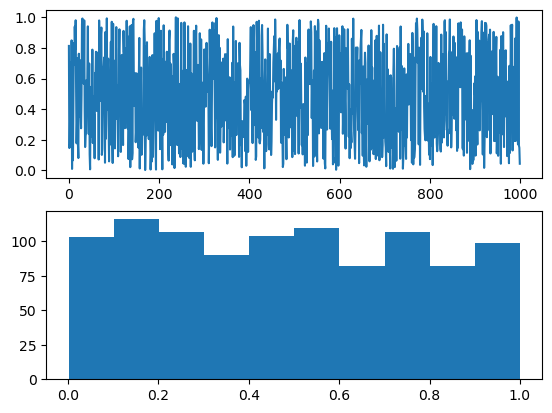

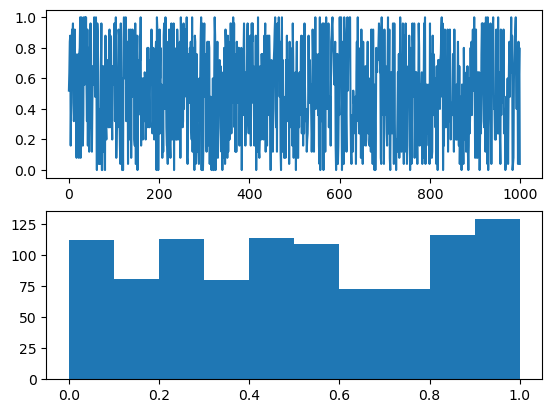

In [6]:
fig, axs = plt.subplots(2, 1)
seq = np.random.uniform(0, 1, 1000)
axs[0].plot(seq)
axs[1].hist(seq)
plt.show()

fig, axs = plt.subplots(2, 1)
seq = [secrets.randbelow(26)/25 for _ in range(1000)]
axs[0].plot(seq)
axs[1].hist(seq)
plt.show()

## Lecture 2 Exercise 3 - Hit and Miss Technique

In [7]:
def estimate_pi(n_samples, seed):
    np.random.seed(seed)
    samples = np.random.uniform(-1, 1, size=(n_samples, 2))
    samples_fraction = np.sum(np.where(np.linalg.norm(samples, axis=1) <= 1, 1, 0)) / n_samples
    area_estimate = 4*samples_fraction
    return area_estimate

n_samples = 10000
n_runs = 100
area_estimates = np.empty(n_runs)
for n in range(n_runs):
    area_estimates[n] = estimate_pi(n_samples, n)

area_mean = np.mean(area_estimates)
print(f"Estimated pi: {area_mean}")
print(f"True pi: {math.pi}")
print(f"Error: {area_mean - math.pi}")

Estimated pi: 3.1418600000000003
True pi: 3.141592653589793
Error: 0.0002673464102072032


## Lecture 2 Exercise 4 - Estimation of the Klein Bottle volume

In [8]:
def test_containment_klein_bottle(pt):
    x = pt[0]
    y = pt[1]
    z = pt[2]
    immersion_eq = (x**2 + y**2 + z**2 + 2*y - 1)*((x**2+y**2+z**2-2*y-1)**2-8*z**2)+16*x*z*(x**2 + y**2 + z**2 + 2*y - 1)
    if immersion_eq <= 0:
        return 1
    else:
        return 0


for n_pts in [10, 100, 1000, 10000]:
    samples = np.random.uniform((-1, -1, -1), (1, 1, 1), size=(n_pts, 3))

    in_sum = sum([test_containment_klein_bottle(s) for s in samples])
    print(f"Volume estimate ({n_pts} samples): {in_sum*8/n_pts}")

Volume estimate (10 samples): 4.8
Volume estimate (100 samples): 3.76
Volume estimate (1000 samples): 3.984
Volume estimate (10000 samples): 3.9872


## Lecture 2 Exercise 5 - Inverse Transform Method

1.0
[0, 0.17, 0.53, 0.8500000000000001, 0.9800000000000001, 1.0]


(array([145., 367., 323., 140.,  25.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

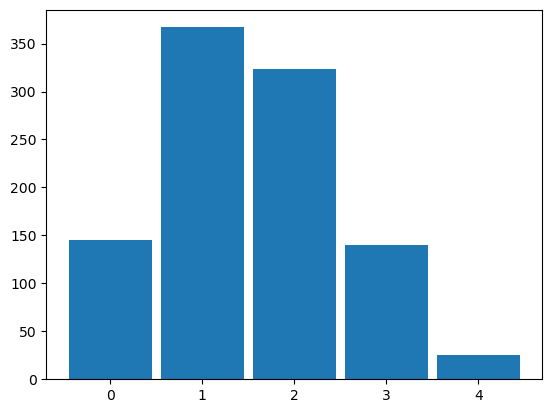

In [9]:
p = [0.17, 0.36, 0.32, 0.13, 0.02]
print(sum(p))
cp = [sum([0]+p[:i]) for i in range(len(p)+1)]
print(cp)

us = np.random.uniform(0, 1, 1000)
x = []
for u in us:
    for i in range(len(p)):
        if cp[i] < u < cp[i+1]:
            x.append(i)

plt.hist(x, bins=[i for i in range(len(p)+1)], align='left', rwidth=0.9)

## Lecture 3 Exercise 1 - Confidence Interval

In [10]:
n_samples = 100
max_runs = 100000

area_estimates = []
area_average = []
for n in range(max_runs):
    area_estimates.append(estimate_pi(n_samples, n))
    area_average = sum(area_estimates)/(n+1)
    if n >= 100:
        std = np.std(np.array(area_estimates))
        if 1.96*std/math.sqrt(n) <= 0.01:
            print(f"Simulation terminated after {n} runs, S = {std}")
            break


Simulation terminated after 1000 runs, S = 0.16127411729363583


## Lecture 3 Exercise 2 - Bootstrapping

In [11]:
def estimate_pi_samples(samples):
    samples_fraction = np.sum(np.where(np.linalg.norm(samples, axis=1) <= 1, 1, 0)) / n_samples
    area_estimate = 4*samples_fraction
    return area_estimate

np.random.seed(13)
n_samples = 10000
n_subsets = 100
subset_size = 200
samples = np.random.uniform(-1, 1, size=(n_samples, 2))
sample_indices = np.arange(n_samples)
area_estimate = estimate_pi_samples(samples)
sq_errors = np.empty(n_subsets)
for i in range(n_subsets):
    subset_indices = np.random.choice(sample_indices, subset_size, True)
    subset = samples[subset_indices]
    sq_errors[i] = (estimate_pi_samples(subset) - area_estimate)**2
mse = np.mean(sq_errors)
print(f"Mean square error is: {mse}")

Mean square error is: 9.491703368000001


## Lecture 4 Exercise 1 - Chi-Square Test

In [12]:
def chi_square_test_uniform(random_numbers, n_bins, chi_thresh=100):
    n_values = len(random_numbers)
    min_seq = np.min(random_numbers)
    max_seq = np.max(random_numbers)
    interval_seq = max_seq - min_seq
    binned_seq = np.floor(((random_numbers - min_seq)/interval_seq)*n_bins)
    chi_sq_sum = 0
    for i in range(n_bins):
        n_i = len([bs for bs in binned_seq if bs == i]) # frequency of outcomes
        # print(n_i)
        expected_n_i = n_values/n_bins # n*p_i
        chi_sq_sum += (n_i - expected_n_i)**2/expected_n_i
    print(f"Aggregated square errors: {chi_sq_sum}")
    return chi_sq_sum < chi_thresh

# Generate random numbers
seq = prng(1000, 7**5, 2**31-1, 21)
# seq = np.random.uniform(0, 1, 1000)
seq_diffs = np.diff(seq)
n_bins = 10000

print(f"Chi square test whether random values are uniform: {chi_square_test_uniform(seq, n_bins, chi_thresh=n_bins-1)}")
print(f"Chi square test whether random value differences are uniform: {chi_square_test_uniform(seq, n_bins ,chi_thresh=n_bins-1)}")

Aggregated square errors: 9992.00000000206
Chi square test whether random values are uniform: True
Aggregated square errors: 9992.00000000206
Chi square test whether random value differences are uniform: True


## Lecture 7 Exercise 1 - Random Walk

Mean estimate of pi using MC: 3.1414072
Mean estimate of pi using RW: 3.941309380301546


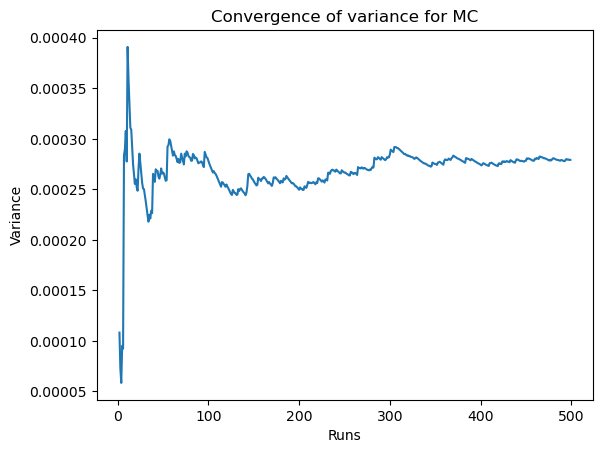

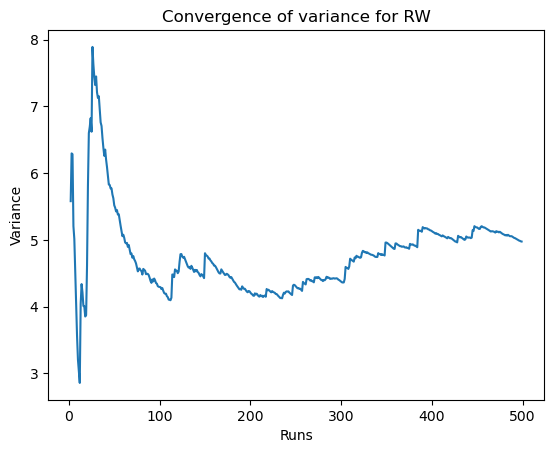

In [90]:
def random_walk_pi_approx(n_steps, seed):
    np.random.seed(seed)
    pos = 0
    pos_unique = []
    for _ in range(n_steps):
        if np.random.uniform(0, 1) > 0.5:
            pos += 1
        else:
            pos -= 1
        if pos not in pos_unique:
            pos_unique.append(pos)
    pi_approx = 8.0*n_steps/(len(pos_unique)**2)
    return pi_approx

n_steps = 10000
n_runs = 500

pi_approx_mc = np.empty(n_runs)
pi_approx_rw = np.empty(n_runs)
for i in range(n_runs):
    pi_approx_mc[i] = estimate_pi(n_steps, i)
    pi_approx_rw[i] = random_walk_pi_approx(n_steps, i+n_runs)
running_var_mc = np.array([np.var(pi_approx_mc[:i]) for i in range(2, n_runs)])
running_var_rw = np.array([np.var(pi_approx_rw[:i]) for i in range(2, n_runs)])
mean_mc = np.mean(pi_approx_mc)
mean_rw = np.mean(pi_approx_rw)

print(f"Mean estimate of pi using MC: {mean_mc}")
print(f"Mean estimate of pi using RW: {mean_rw}")

plt.plot(np.arange(2, n_runs, 1), running_var_mc)
plt.xlabel("Runs")
plt.ylabel("Variance")
plt.title("Convergence of variance for MC")
plt.show()
plt.plot(np.arange(2, n_runs, 1), running_var_rw)
plt.xlabel("Runs")
plt.ylabel("Variance")
plt.title("Convergence of variance for RW")
plt.show()

## Lecture 7 Exercise 1 - Gibbs Sampler